# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import dataset

In [2]:
dataset = pd.read_csv("Mall_Customers.csv")

In [3]:
X = dataset.iloc[:,[3,4]]

In [4]:
X.iloc[:,0].nunique(),X.iloc[:,1].nunique()

(64, 84)

In [5]:
 X = X.values

# Use Elbow method to find optimal k

In [6]:
from sklearn.cluster import KMeans
import warnings
warnings.simplefilter(action='ignore', category=Warning)

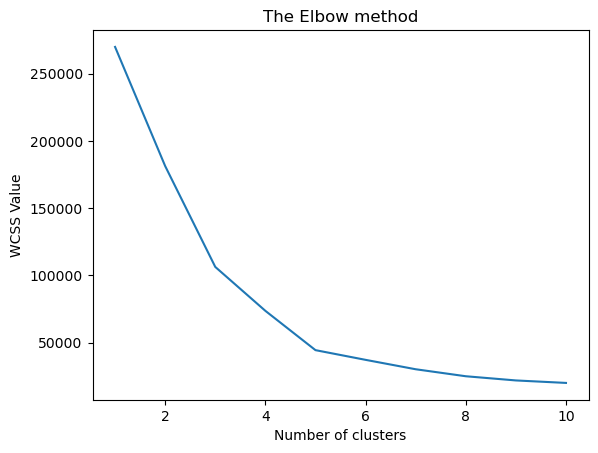

In [7]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("The Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS Value")
plt.show()

# Apply 5-Means

In [8]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
predictions = kmeans.fit_predict(X)

In [9]:
print(predictions)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


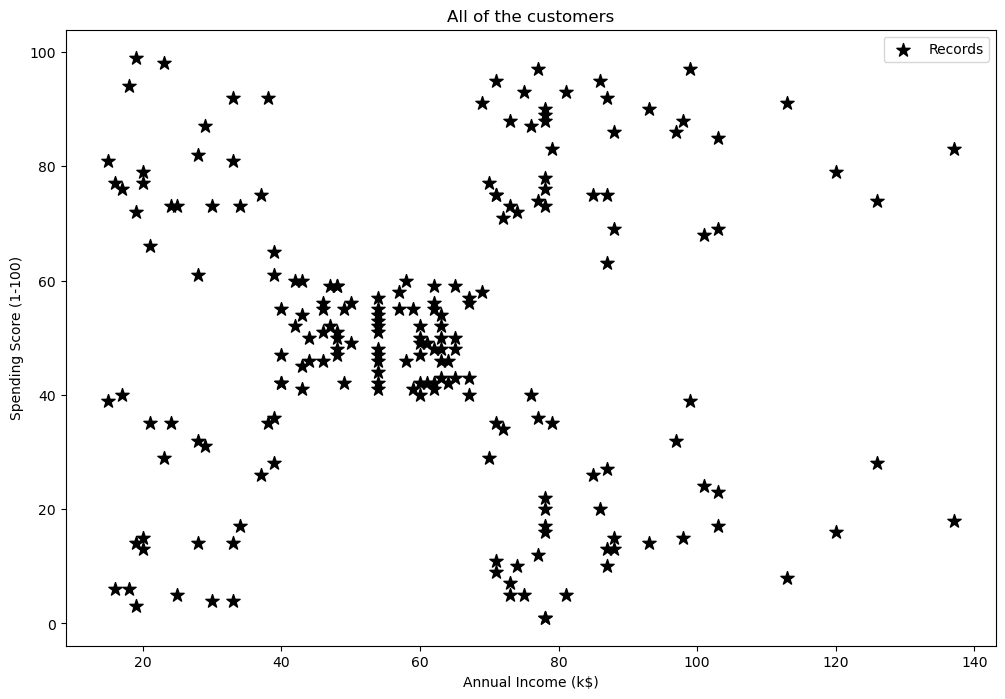

In [10]:
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], s = 100, c = 'black', label = 'Records', marker="*")
plt.title('All of the customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

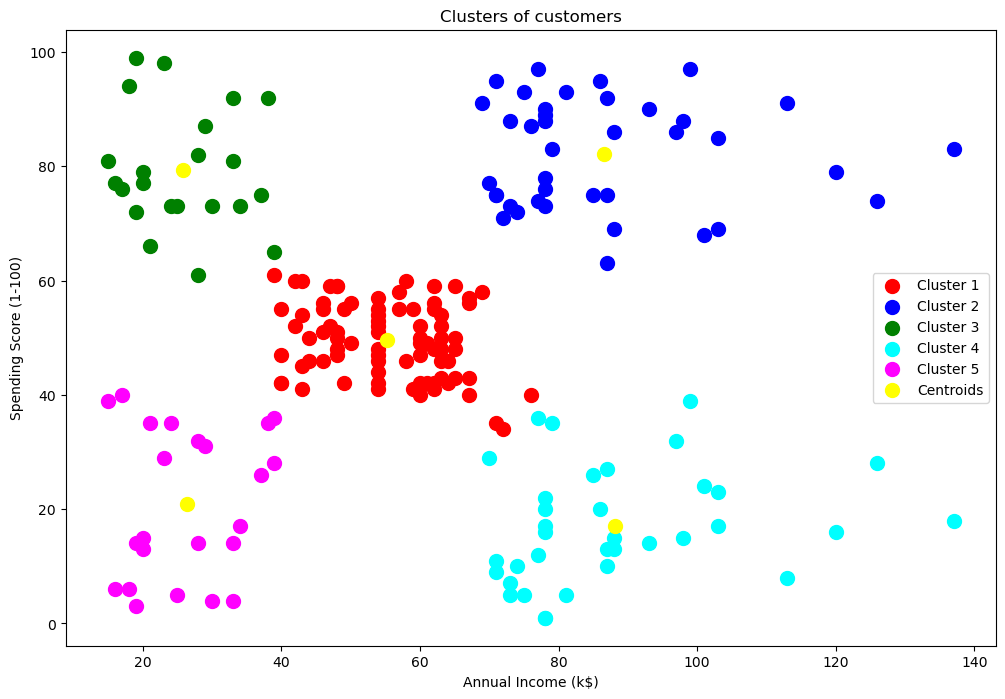

In [11]:
plt.figure(figsize=(12,8))
plt.scatter(X[predictions == 0, 0], X[predictions == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[predictions == 1, 0], X[predictions == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[predictions == 2, 0], X[predictions == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[predictions == 3, 0], X[predictions == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[predictions == 4, 0], X[predictions == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=100, c="yellow", label="Centroids")

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()